In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
def read_data(filepath):
    df = pd.read_csv(filepath)
    return df

### 회사 연도별 주식데이터를 통해 수익률 계산

In [13]:
def data_process_year(df):
    year_list = []
    month_list = []
    day_list = []

    for i in df.index:
        date = df.loc[i, 'Date'].split('-')
        year_list.append(date[0])
        month_list.append(date[1])
        day_list.append(date[2])

    df['year'] = year_list
    df['month'] = month_list
    df['day'] = day_list

    #날짜 데이터 타입 변경
    df = df.astype({'year':'int64', 'month':'int64', 'day':'int64'})
    # df_ym_db = df.groupby(['year', 'month'])[['Close']].mean()

    mean_df = df.groupby(['year'])[['Close']].mean()
    mean_df = mean_df.pct_change() * 100
    mean_df.reset_index(drop=False, inplace=True)
    mean_df.rename(columns={'Close':'수익률'}, inplace=True)

    return mean_df

def show_chart_year(name, df):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.figure(figsize=(10,6))

    # sns.set(style='darkgrid')
    sns.lineplot('year', '수익률', data=df)
    plt.title(f'10년 동안 {name} 수익률(%)')
    plt.show()


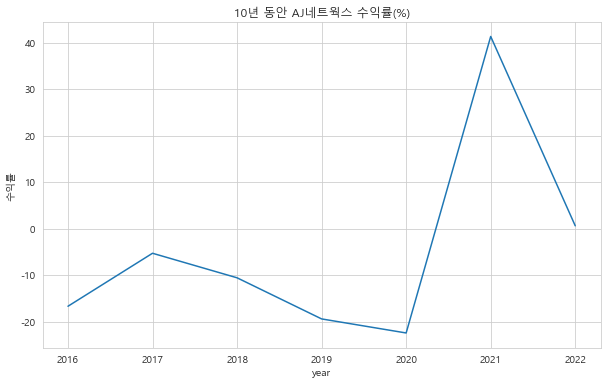

In [99]:
import os
jusik_files = os.listdir('./data/회사별주식데이터/')
total_profit_df = pd.DataFrame()
company_name = []

for name in jusik_files[:1]:
    jusik_df = read_data(f'./data/회사별주식데이터/{name}')
    profit_df = data_process_year(jusik_df)
    # for i in range(len(profit_df)):
    #     company_name.append(name[:-4])
    # total_profit_df = pd.concat([total_profit_df, profit_df], ignore_index=True)
    show_chart_year(name[:-4], profit_df)
#
# total_profit_df['종목명'] = company_name
# total_profit_df.head()

In [25]:
total_profit_df.to_csv('./data/모든회사수익률데이터/회사수익률.csv', index=False)

### 회사별 연도별 수익률 데이터 하나로 합치기

In [ ]:
'''
        연도 수익률 종합등급 환경 사회 지배구조 ROA ROE Q KOSPI
회사1
회사2
회사3
...
회사N

'''

### 수익률과 ESG 등급 매치시키기 (merge)

In [6]:
esg_df = pd.read_csv('data/data(11-18)/2011_2022_ESGdata')
esg_df.drop(columns=['Unnamed: 0'], inplace=True)
esg_df.head()

,기업명,종합등급,환경,사회,지배구조,연도,기업코드
0,AJ네트웍스,B,D,B,B,2022,095570
1,AK홀딩스,B+,B,B+,B+,2022,006840
2,BGF,A,A,A+,A,2022,027410
3,BGF리테일,A,A,A+,A,2022,282330
4,BNK금융지주,A+,A,A+,A+,2022,138930


In [7]:
esg_df.tail()

,기업명,종합등급,환경,사회,지배구조,연도,기업코드
8732,하나금융지주,B+,A+,B+,B,2011,086790
8733,하나은행,B,A,B,B,2011,004940
8734,서연,B,B,B,B,2018,007860
8735,서연이화,B+,B+,B+,B,2018,200880
8736,서울도시가스,B,B,B,B,2018,017390


In [27]:
total_profit_df = pd.read_csv('./data/모든회사수익률데이터/회사수익률.csv')
total_profit_df = total_profit_df[['종목명', 'year', '수익률']]
total_profit_df.head()

,종목명,year,수익률
0,AJ네트웍스,2015,NaN
1,AJ네트웍스,2016,-16.696604
2,AJ네트웍스,2017,-5.305182
3,AJ네트웍스,2018,-10.580189
4,AJ네트웍스,2019,-19.419833


In [33]:
del_list = []

for i in total_profit_df.index:
    year = total_profit_df.loc[i, 'year']
    if year == 2010:
        del_list.append(i)

total_profit_df.drop(del_list, inplace=True)
total_profit_df.rename(columns={'year':'연도'}, inplace=True)

In [45]:
total_profit_df

,종목명,연도,수익률
0,AJ네트웍스,2015,NaN
1,AJ네트웍스,2016,-16.696604
2,AJ네트웍스,2017,-5.305182
3,AJ네트웍스,2018,-10.580189
4,AJ네트웍스,2019,-19.419833
...,...,...,...
7982,후성,2018,9.756829
7983,후성,2019,-16.629993
7984,후성,2020,2.963594
7985,후성,2021,71.718989


In [41]:
esg_df = esg_df[['기업명', '연도', '종합등급', '환경', '사회', '지배구조']]
esg_df.rename(columns={'기업명':'종목명'}, inplace=True)

In [47]:
merged_df = pd.merge(total_profit_df, esg_df, on=['종목명', '연도'], how='left')
merged_df

,종목명,연도,수익률,종합등급,환경,사회,지배구조
0,AJ네트웍스,2015,NaN,NaN,NaN,NaN,NaN
1,AJ네트웍스,2016,-16.696604,B,C,B,B
2,AJ네트웍스,2017,-5.305182,B,B,B,B
3,AJ네트웍스,2018,-10.580189,B,C,B,B
4,AJ네트웍스,2019,-19.419833,B,D,B,B
...,...,...,...,...,...,...,...
7434,후성,2018,9.756829,B,B,B,B+
7435,후성,2019,-16.629993,B,B,C,B
7436,후성,2020,2.963594,C,B,C,C
7437,후성,2021,71.718989,B+,A,B,B


### 코스피 지수 연도별로 평균치 구하기

In [65]:
kospi_df = pd.read_csv('data/코스피지수.csv')
kospi_df

,Date,KOSPI
0,2011-01-03,2070.080078
1,2011-01-04,2085.139893
2,2011-01-05,2082.550049
3,2011-01-06,2077.610107
4,2011-01-07,2086.199951
...,...,...
2785,2022-04-28,2667.489990
2786,2022-04-29,2695.050049
2787,2022-05-02,2687.449951
2788,2022-05-03,2680.459961


In [66]:
def kospi_process(df):
    year_list = []
    month_list = []
    day_list = []

    for i in df.index:
        date = df.loc[i, 'Date'].split('-')
        year_list.append(date[0])
        month_list.append(date[1])
        day_list.append(date[2])

    df['연도'] = year_list
    df['month'] = month_list
    df['day'] = day_list

    #날짜 데이터 타입 변경
    df = df.astype({'연도':'int64', 'month':'int64', 'day':'int64'})

    mean_df = df.groupby(['연도'])[['KOSPI']].mean()

    return mean_df

In [67]:
kospi_df = kospi_process(kospi_df)
kospi_df.reset_index(drop=False, inplace=True)
kospi_df.to_csv('./data/연도별코스피지수.csv')

### 최종 데이터에 코스피 지수 매치시키기

In [68]:
kospi_df

,연도,KOSPI
0,2011,1984.542060
1,2012,1930.372702
2,2013,1960.499716
3,2014,1982.158124
4,2015,2011.848749
5,2016,1987.003253
6,2017,2310.368425
7,2018,2325.009433
8,2019,2106.053582
9,2020,2220.068017


In [75]:
merged_df2 = pd.merge(merged_df, kospi_df, on='연도', how='left')
merged_df2

,종목명,연도,수익률,종합등급,환경,사회,지배구조,KOSPI
0,AJ네트웍스,2015,NaN,NaN,NaN,NaN,NaN,2011.848749
1,AJ네트웍스,2016,-16.696604,B,C,B,B,1987.003253
2,AJ네트웍스,2017,-5.305182,B,B,B,B,2310.368425
3,AJ네트웍스,2018,-10.580189,B,C,B,B,2325.009433
4,AJ네트웍스,2019,-19.419833,B,D,B,B,2106.053582
...,...,...,...,...,...,...,...,...
7434,후성,2018,9.756829,B,B,B,B+,2325.009433
7435,후성,2019,-16.629993,B,B,C,B,2106.053582
7436,후성,2020,2.963594,C,B,C,C,2220.068017
7437,후성,2021,71.718989,B+,A,B,B,3111.217654


In [109]:
# def jemu_data_process(df):
#     drop_idx = df[df['자산총계'] == '-'].index
#     df.drop(drop_idx, inplace=True)
#     df = df.astype({'자산총계':'int64'})
#     df = df[['기업명', '연도', '자산총계', '자본총계', '당기순이익']]
#
#     jemu_year = []
#     for i in df.index:
#         name = df.loc[i, '기업명']
#         year = str(df.loc[i, '연도'])[2:]
#         jemu_year.append(name+'_'+year)
#
#     df['기업명_연도'] = jemu_year
#     df = df[['기업명_연도', '자산총계', '자본총계', '당기순이익']]
#
#     # ROA, ROE 계산
#     df['ROA'] = df['당기순이익'] / df['자산총계'] * 100
#     df['ROE'] = df['당기순이익'] / df['자본총계'] * 100
#     df.drop(columns=['자산총계', '자본총계', '당기순이익'], inplace=True)
#
#     return df
#
# def merge_df(df1, df2):
#     merged_df = pd.merge(df1, df2, on='기업명_연도', how='left')
#     return merged_df

In [70]:
roa_df = pd.read_csv('./data/ROAE/ROA.csv')
roa_df.drop(columns=['Unnamed: 0'], inplace=True)
roa_df

,종목명,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,지역난방공사,0.329259,0.459999,-0.434100,-4.003602,1.221306,2.468098,2.391064,1.398306,2.311534,-0.157896,2.020051
1,아시아나IDT,11.867460,-3.994284,-3.522264,4.468853,9.795924,12.854945,NaN,NaN,NaN,NaN,NaN
2,코스맥스,2.431885,-2.443426,1.521121,1.984152,1.661652,4.721321,4.302619,4.837811,NaN,NaN,NaN
3,경인양행,4.695501,-1.500994,3.468235,3.341888,1.335167,1.985928,1.123672,3.241846,3.223183,1.004116,2.589728
4,국동,-4.718183,5.906318,-3.382628,1.715001,-8.435693,5.001944,5.584140,9.968135,5.489170,-10.959402,-1.769757
...,...,...,...,...,...,...,...,...,...,...,...,...
881,네이처셀,-45.988188,-22.005449,0.968753,4.226556,-0.895671,-9.251320,-4.295236,7.723693,-15.245468,-6.537991,-1.012268
882,한국가스공사,2.208666,-0.447463,0.148223,1.327157,-3.208814,-1.529589,0.688375,0.956176,-0.466352,0.430084,0.763386
883,SK네트웍스,1.100212,0.479319,-1.209348,0.098687,0.478874,-0.946265,0.890377,0.371773,-6.665055,1.333901,1.624122
884,두산,2.524932,-3.191589,1.484781,-1.179043,0.159717,0.175883,-5.389762,0.105994,0.417660,5.922213,12.960873


In [71]:
roe_df = pd.read_csv('./data/ROAE/ROE.csv')
roe_df.drop(columns=['Unnamed: 0'], inplace=True)
roe_df

,종목명,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,지역난방공사,1.177011,1.548808,-1.672549,-14.519332,3.819035,7.019784,6.727201,4.059798,7.232557,-0.507174,6.705232
1,아시아나IDT,16.944344,-6.283906,-5.695105,6.222715,14.154269,20.345358,NaN,NaN,NaN,NaN,NaN
2,코스맥스,7.378088,-10.685314,5.788710,8.709081,6.795555,15.165390,19.566545,19.565331,NaN,NaN,NaN
3,경인양행,10.803226,-3.319684,6.895785,6.168180,2.265745,3.282643,1.825178,5.119207,5.383935,1.649455,4.696179
4,국동,-7.765321,12.730656,-6.907898,4.356388,-21.035857,12.003213,16.766765,31.071544,26.013939,-76.540402,-20.692899
...,...,...,...,...,...,...,...,...,...,...,...,...
881,네이처셀,-52.643072,-30.103738,1.101505,5.181698,-1.166962,-14.651393,-6.269474,13.784261,-32.576785,-18.818102,-3.315452
882,한국가스공사,10.576671,-2.077309,0.715264,6.198465,-14.639740,-6.465498,2.896147,4.598989,-2.279680,2.087562,3.417943
883,SK네트웍스,4.334040,1.872976,-5.318852,0.331636,1.473706,-3.390968,2.899079,1.255567,-23.071956,4.622872,5.512201
884,두산,7.728926,-12.412377,6.350968,-4.765693,0.604322,0.638114,-20.263356,0.373491,1.437053,11.002250,23.388759


In [74]:
roa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     886 non-null    object 
 1   2021    880 non-null    float64
 2   2020    884 non-null    float64
 3   2019    881 non-null    float64
 4   2018    876 non-null    float64
 5   2017    867 non-null    float64
 6   2016    846 non-null    float64
 7   2015    820 non-null    float64
 8   2014    800 non-null    float64
 9   2013    777 non-null    float64
 10  2012    654 non-null    float64
 11  2011    634 non-null    float64
dtypes: float64(11), object(1)
memory usage: 83.2+ KB


In [88]:
del_list = []
for i in merged_df2.index:
    year = merged_df2.loc[i, '연도']
    if year == 2022:
        del_list.append(i)

merged_df2.drop(del_list, inplace=True)
merged_df2

,종목명,연도,수익률,종합등급,환경,사회,지배구조,KOSPI
0,AJ네트웍스,2015,NaN,NaN,NaN,NaN,NaN,2011.848749
1,AJ네트웍스,2016,-16.696604,B,C,B,B,1987.003253
2,AJ네트웍스,2017,-5.305182,B,B,B,B,2310.368425
3,AJ네트웍스,2018,-10.580189,B,C,B,B,2325.009433
4,AJ네트웍스,2019,-19.419833,B,D,B,B,2106.053582
...,...,...,...,...,...,...,...,...
7433,후성,2017,45.240416,B,C,B,B+,2310.368425
7434,후성,2018,9.756829,B,B,B,B+,2325.009433
7435,후성,2019,-16.629993,B,B,C,B,2106.053582
7436,후성,2020,2.963594,C,B,C,C,2220.068017


In [77]:
roa_df.set_index('종목명', inplace=True)
roa_df

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
종목명,,,,,,,,,,,
지역난방공사,0.329259,0.459999,-0.434100,-4.003602,1.221306,2.468098,2.391064,1.398306,2.311534,-0.157896,2.020051
아시아나IDT,11.867460,-3.994284,-3.522264,4.468853,9.795924,12.854945,NaN,NaN,NaN,NaN,NaN
코스맥스,2.431885,-2.443426,1.521121,1.984152,1.661652,4.721321,4.302619,4.837811,NaN,NaN,NaN
경인양행,4.695501,-1.500994,3.468235,3.341888,1.335167,1.985928,1.123672,3.241846,3.223183,1.004116,2.589728
국동,-4.718183,5.906318,-3.382628,1.715001,-8.435693,5.001944,5.584140,9.968135,5.489170,-10.959402,-1.769757
...,...,...,...,...,...,...,...,...,...,...,...
네이처셀,-45.988188,-22.005449,0.968753,4.226556,-0.895671,-9.251320,-4.295236,7.723693,-15.245468,-6.537991,-1.012268
한국가스공사,2.208666,-0.447463,0.148223,1.327157,-3.208814,-1.529589,0.688375,0.956176,-0.466352,0.430084,0.763386
SK네트웍스,1.100212,0.479319,-1.209348,0.098687,0.478874,-0.946265,0.890377,0.371773,-6.665055,1.333901,1.624122


In [78]:
roe_df.set_index('종목명', inplace=True)
roe_df

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
종목명,,,,,,,,,,,
지역난방공사,1.177011,1.548808,-1.672549,-14.519332,3.819035,7.019784,6.727201,4.059798,7.232557,-0.507174,6.705232
아시아나IDT,16.944344,-6.283906,-5.695105,6.222715,14.154269,20.345358,NaN,NaN,NaN,NaN,NaN
코스맥스,7.378088,-10.685314,5.788710,8.709081,6.795555,15.165390,19.566545,19.565331,NaN,NaN,NaN
경인양행,10.803226,-3.319684,6.895785,6.168180,2.265745,3.282643,1.825178,5.119207,5.383935,1.649455,4.696179
국동,-7.765321,12.730656,-6.907898,4.356388,-21.035857,12.003213,16.766765,31.071544,26.013939,-76.540402,-20.692899
...,...,...,...,...,...,...,...,...,...,...,...
네이처셀,-52.643072,-30.103738,1.101505,5.181698,-1.166962,-14.651393,-6.269474,13.784261,-32.576785,-18.818102,-3.315452
한국가스공사,10.576671,-2.077309,0.715264,6.198465,-14.639740,-6.465498,2.896147,4.598989,-2.279680,2.087562,3.417943
SK네트웍스,4.334040,1.872976,-5.318852,0.331636,1.473706,-3.390968,2.899079,1.255567,-23.071956,4.622872,5.512201


In [90]:
company_list = roa_df.index.to_list()

In [91]:
roa_list = []
roe_list = []

for i in merged_df2.index:
    company_name = merged_df2.loc[i, '종목명']
    year = str(merged_df2.loc[i, '연도'])

    if company_name in company_list:
        roa_val = roa_df.loc[company_name, year]
        roe_val = roe_df.loc[company_name, year]
    else:
        roa_val = ' '
        roe_val = ' '

    roa_list.append(roa_val)
    roe_list.append(roe_val)

In [94]:
merged_df2['ROA'] = roa_list
merged_df2['ROE'] = roe_list

In [95]:
merged_df2

,종목명,연도,수익률,종합등급,환경,사회,지배구조,KOSPI,ROA,ROE
0,AJ네트웍스,2015,NaN,NaN,NaN,NaN,NaN,2011.848749,1.680447,7.283971
1,AJ네트웍스,2016,-16.696604,B,C,B,B,1987.003253,0.820595,3.995265
2,AJ네트웍스,2017,-5.305182,B,B,B,B,2310.368425,0.877023,4.61727
3,AJ네트웍스,2018,-10.580189,B,C,B,B,2325.009433,1.447255,7.577926
4,AJ네트웍스,2019,-19.419833,B,D,B,B,2106.053582,2.336252,12.128881
...,...,...,...,...,...,...,...,...,...,...
7433,후성,2017,45.240416,B,C,B,B+,2310.368425,8.928117,13.509607
7434,후성,2018,9.756829,B,B,B,B+,2325.009433,6.353841,11.426047
7435,후성,2019,-16.629993,B,B,C,B,2106.053582,0.038912,0.084715
7436,후성,2020,2.963594,C,B,C,C,2220.068017,0.490757,1.081137


In [98]:
roa_df.loc['AJ네트웍스']

2021    5.663071
2020   -0.208845
2019    2.336252
2018    1.447255
2017    0.877023
2016    0.820595
2015    1.680447
2014    1.951326
2013    1.450233
2012    1.255483
2011    1.030702
Name: AJ네트웍스, dtype: float64